# 🧪 Séance de Coding : EDA & Visualisation avec Pandas/Seaborn
📅 Date : 18 July 2025

Ce notebook permet d'explorer une base de données issue d'Amazon. On y applique les étapes d'analyse exploratoire des données (EDA) et de visualisation avec Python.

## 📌 Objectifs pédagogiques
- Manipuler des données réelles
- Visualiser les distributions, les corrélations
- Répondre à des questions analytiques concrètes


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# Télécharger le fichier CSV directement depuis GitHub
!wget https://raw.githubusercontent.com/bidoscar/AFRICITIZEN-ACDS-Coding/main/Seance_1/Datasets/amazon.csv

--2025-07-18 16:02:08--  https://raw.githubusercontent.com/bidoscar/AFRICITIZEN-ACDS-Coding/main/Seance_1/Datasets/amazon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4744481 (4.5M) [text/plain]
Saving to: ‘amazon.csv.2’

amazon.csv.2        100%[===================>]   4.52M  --.-KB/s    in 0.07s   

2025-07-18 16:02:08 (64.1 MB/s) - ‘amazon.csv.2’ saved [4744481/4744481]



In [48]:
# Chargement du fichier CSV
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

# **🧼 Étape 1 : Nettoyage minimal pour EDA**

In [50]:
# Créons d'abord une copie de notre jeu de données
df1 = df.copy()

In [51]:
# On a remarqué la présence de | dans la colonne rating
# Essayons de le remplacer par une value manquant (on peut aussi décider de le remplacer avec la médiane ou la moyenne)
df1['rating'] = df1['rating'].replace('|', np.nan)

In [52]:
# Enlevons le symbol de devise et le délimitateur de millier
df1['discounted_price'] = df1['discounted_price'].str.replace("₹", "").str.replace(",", "").astype(float)
df1['actual_price'] = df1['actual_price'].str.replace("₹", "").str.replace(",", "").astype(float)
df1['rating'] = df1['rating'].str.replace(",", "").astype(float)
df1['rating_count'] = df1['rating_count'].str.replace(",", "").astype(float)

In [53]:
# Changeons le type de donnée et ramenons le pourcentage en proportion (entre 0 et 1) dans discount_Percentage
df1['discount_percentage'] = df1['discount_percentage'].str.replace('%','').astype('float64')
df1['discount_percentage'] = df1['discount_percentage'] / 100

# **Etape 2 : Résumé statistique & infos générales**

In [54]:
df1.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096585,18295.541353
std,6944.304394,10874.826864,0.216359,0.291674,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [55]:
df.describe()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [56]:
df1.describe(include="all")

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465.000000,1465.000000,1465.000000,1464.000000,1463.000000,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,NaN,NaN,NaN,NaN,NaN,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,NaN,NaN,NaN,NaN,NaN,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,NaN,NaN,NaN,NaN,NaN,6,10,10,10,10,8,3,1
mean,NaN,NaN,NaN,3125.310874,5444.990635,0.476915,4.096585,18295.541353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6944.304394,10874.826864,0.216359,0.291674,42753.864952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,39.000000,39.000000,0.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,325.000000,800.000000,0.320000,4.000000,1186.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,799.000000,1650.000000,0.500000,4.100000,5179.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1999.000000,4295.000000,0.630000,4.300000,17336.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [58]:
df.dropna(axis=0, inplace=True)

# **🧪 Etape 3 : Analyse Univariée Enrichie en Python**
📅 Séance du 18 July 2025

Dans ce notebook enrichi, nous allons approfondir l'analyse univariée :
- Variable **continue** : `rating`
- Variable **catégorielle** : `category`
Nous aborderons :
- Statistiques descriptives
- Densité, Boxplot, ECDF, Skewness/Kurtosis
- Visualisations matplotlib & seaborn
- Interprétations

## 📊 3.1 Analyse d'une variable continue : `rating`

In [59]:
df1['rating'].describe()

,rating
count,1464.000000
mean,4.096585
std,0.291674
min,2.000000
25%,4.000000
50%,4.100000
75%,4.300000
max,5.000000


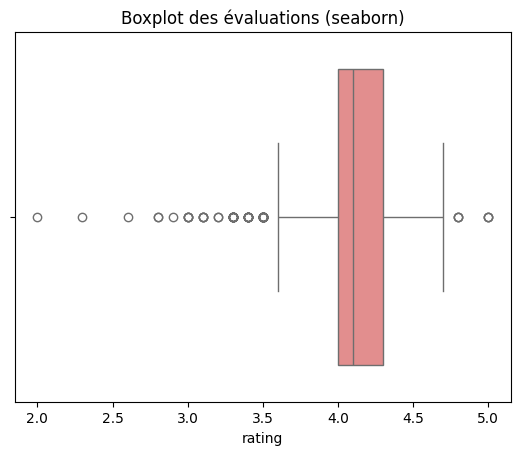

In [60]:
sns.boxplot(x=df1['rating'], color='lightcoral')
plt.title('Boxplot des évaluations (seaborn)')
plt.show()

In [61]:
# écart interquartile, skewness, kurtosis
q1 = df1['rating'].quantile(0.25)
q3 = df1['rating'].quantile(0.75)
iqr = q3 - q1
skew = df1['rating'].skew()
kurt = df1['rating'].kurtosis()
iqr, skew, kurt

(np.float64(0.2999999999999998),
 np.float64(-1.2428954369559149),
 np.float64(4.359519530755221))

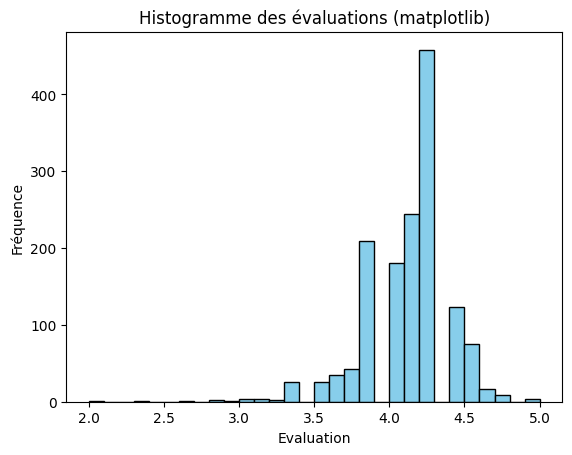

In [62]:
plt.hist(df1['rating'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogramme des évaluations (matplotlib)')
plt.xlabel('Evaluation')
plt.ylabel('Fréquence')
plt.show()

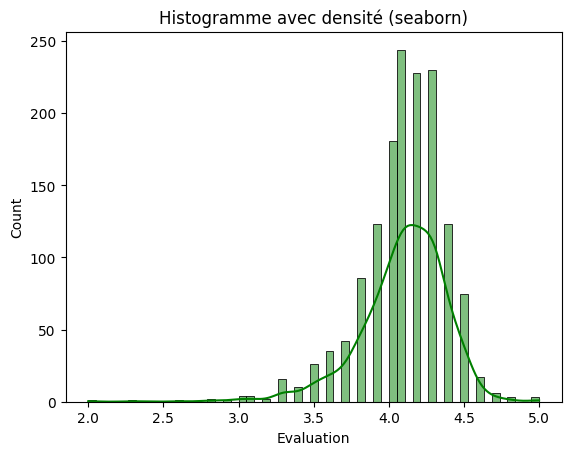

In [63]:
sns.histplot(df1['rating'], kde=True, color='green')
plt.title('Histogramme avec densité (seaborn)')
plt.xlabel('Evaluation')
plt.show()

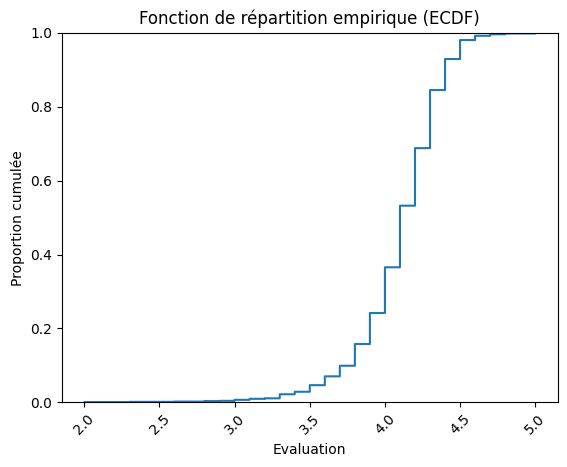

In [64]:
sns.ecdfplot(df1['rating'])
plt.title('Fonction de répartition empirique (ECDF)')
plt.xlabel('Evaluation')
plt.ylabel('Proportion cumulée')
#xticks = np.linspace(df1['rating'].min(), df1['rating'].max(), 6)  # ou un nombre plus petit
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

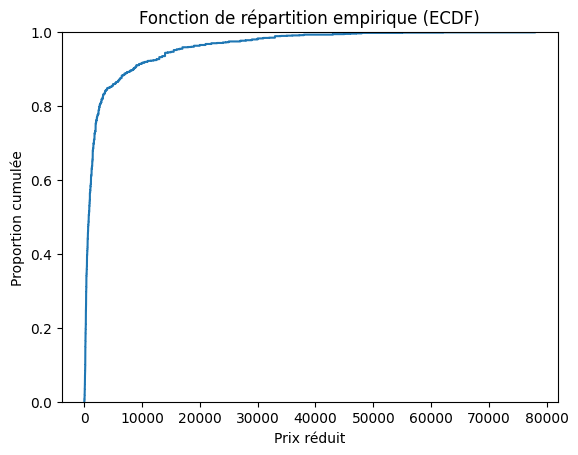

In [65]:
sns.ecdfplot(df1['discounted_price'])
plt.title('Fonction de répartition empirique (ECDF)')
plt.xlabel('Prix réduit')
plt.ylabel('Proportion cumulée')
#xticks = np.linspace(df1['rating'].min(), df1['rating'].max(), 6)  # ou un nombre plus petit
#plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()

## 📊 3.2 Analyse d'une variable catégorielle : `category`

In [66]:
df1['category'].nunique()

211

In [67]:
df1['category'].mode()[0]

'Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables'

In [68]:
df1['category'].value_counts().head(5)

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52


In [69]:
(df1['category'].value_counts(normalize=True)*100).head(5)

,proportion
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,15.904437
Electronics|WearableTechnology|SmartWatches,5.187713
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,4.641638
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",4.300341
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",3.549488


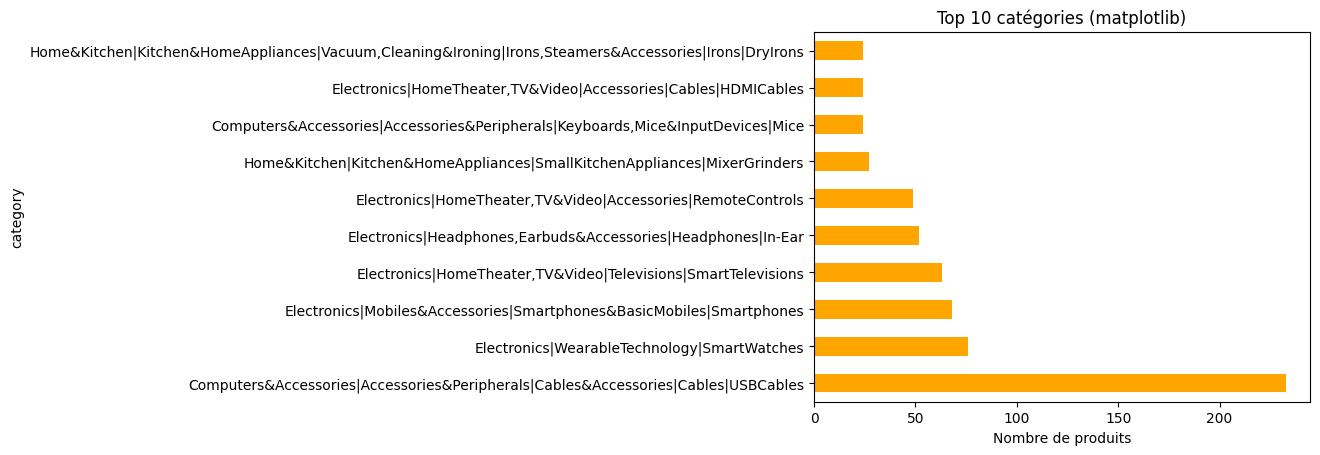

In [70]:
top10 = df1['category'].value_counts().head(10)
top10.plot(kind='barh', color='orange')
plt.title('Top 10 catégories (matplotlib)')
plt.xlabel('Nombre de produits')
plt.show()

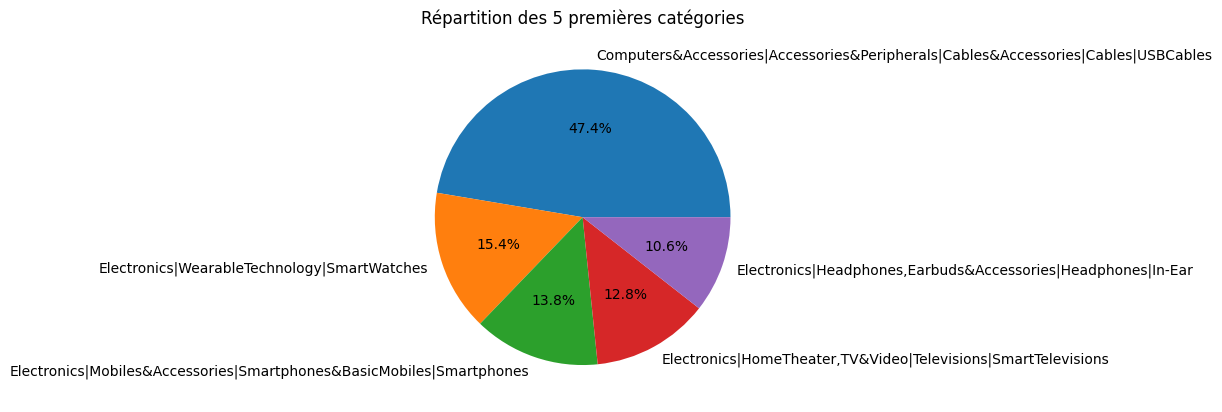

In [71]:
top5 = df1['category'].value_counts().head(5)
top5.plot(kind='pie', autopct='%1.1f%%')
plt.title('Répartition des 5 premières catégories')
plt.ylabel('')
plt.show()

## 📊 3.3 Analyse d'une variable catégorielle : `rating_level`

In [72]:
# Une copy de notre jeu de données
df2 = df1.copy()

In [73]:
# Create a new categorical variable from rating
def classify_rating(r):
    if r <= 2.5:
        return "Low"
    elif r <= 3.9:
        return "Medium"
    else:
        return "High"

df2['rating_level'] = df2['rating'].apply(classify_rating)

In [74]:
df2['rating_level'].value_counts()

,count
rating_level,
High,1111
Medium,352
Low,2


In [75]:
# Create a new categorical variable from rating
def classify_rating(r):
    if r <= 3.9:
        return "Medium"
    else:
        return "High"

df2['rating_level'] = df2['rating'].apply(classify_rating)

In [76]:
df2['rating_level'].value_counts()

,count
rating_level,
High,1111
Medium,354


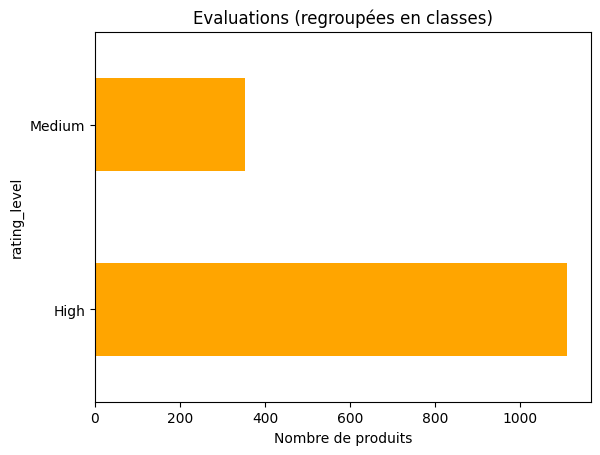

In [77]:
rating_classes = df2['rating_level'].value_counts()
rating_classes.plot(kind='barh', color='orange')
plt.title('Evaluations (regroupées en classes)')
plt.xlabel('Nombre de produits')
plt.show()

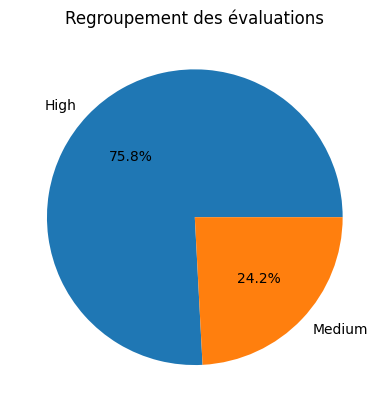

In [78]:
rating_classes.plot(kind='pie', autopct='%1.1f%%')
plt.title('Regroupement des évaluations')
plt.ylabel('')
plt.show()

# 🔗 **Etape 4 : Analyse Bivariée en Python**

Dans cette partie, nous allons explorer **l'analyse bivariée**, c’est-à-dire l’étude de la relation entre deux variables.

Nous allons couvrir trois cas classiques :
1. Deux variables **continues**
2. Deux variables **catégorielles**
3. Une variable **continue** et une **catégorielle**

## **La vue d'ensemble**

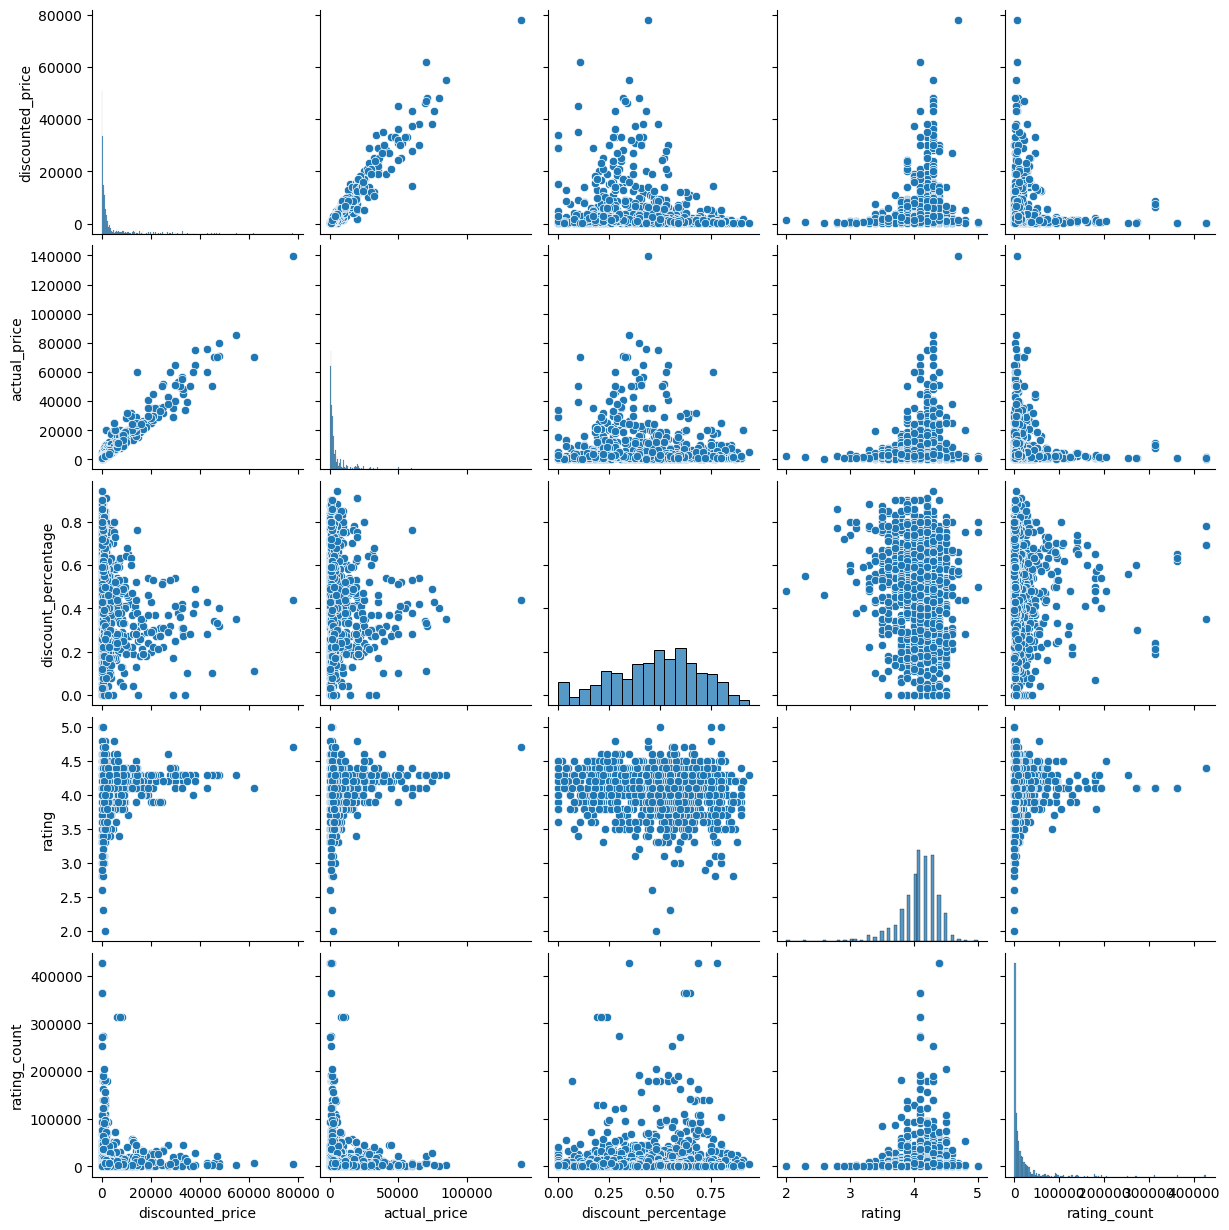

In [79]:
# Croiser les variables numériques entre elles
sns.pairplot(df2)

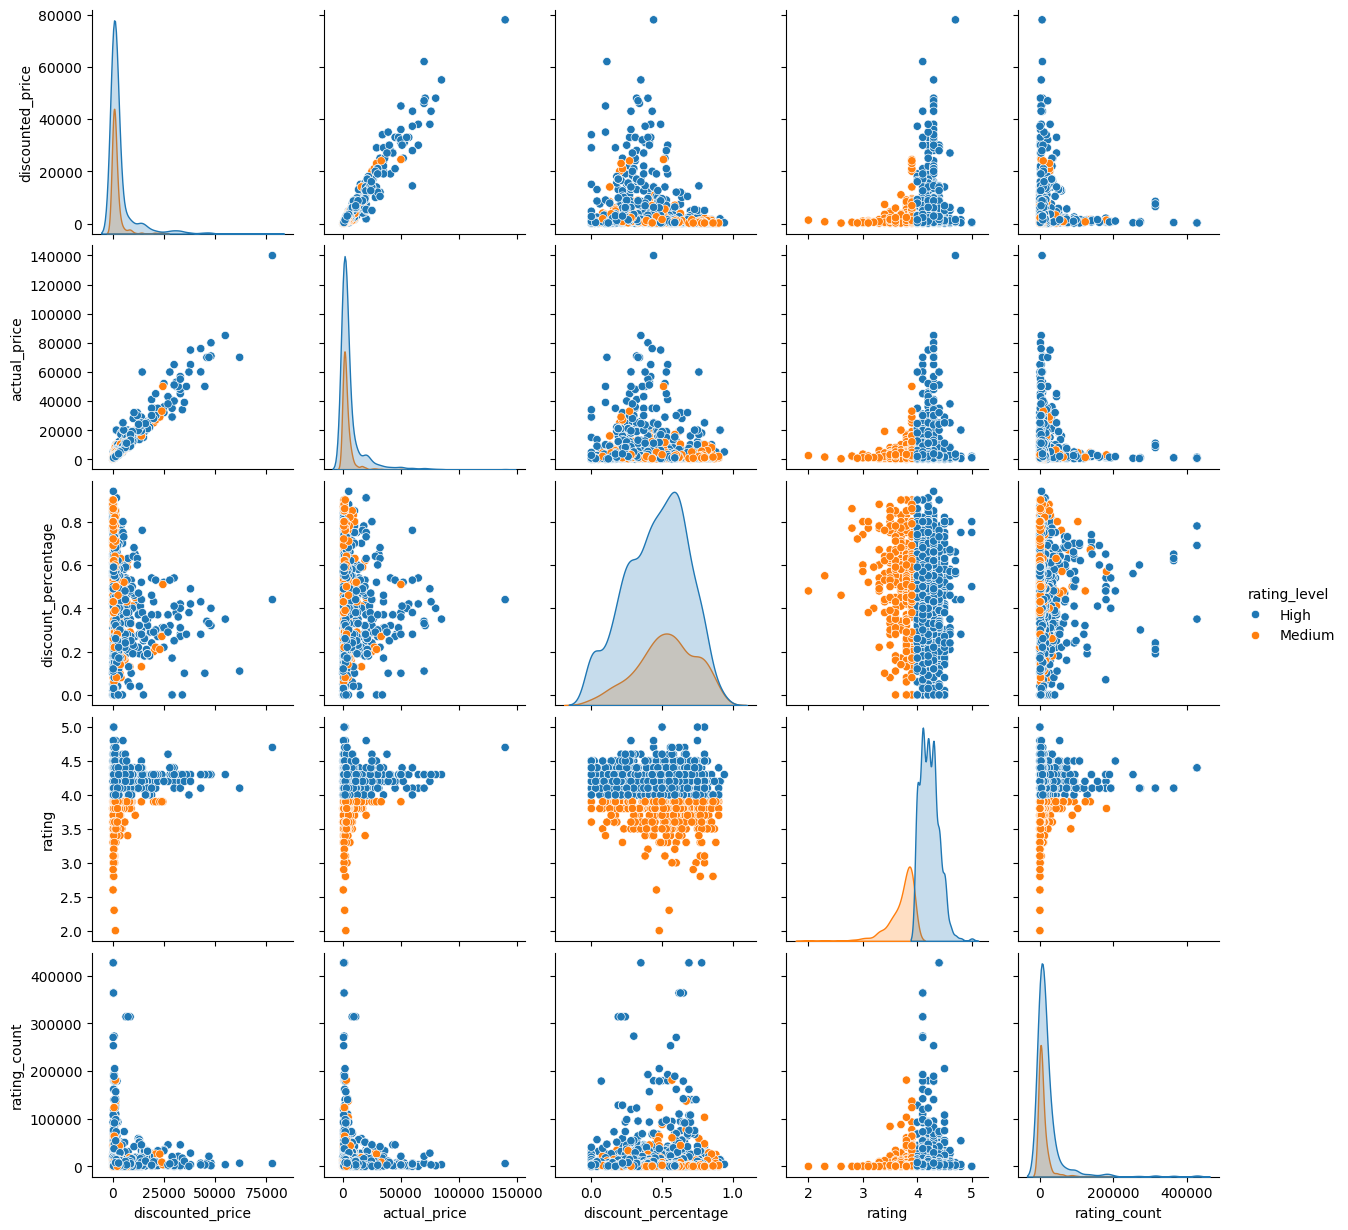

In [80]:
# Croiser les variables numériques entre elles
sns.pairplot(df2, hue= 'rating_level')

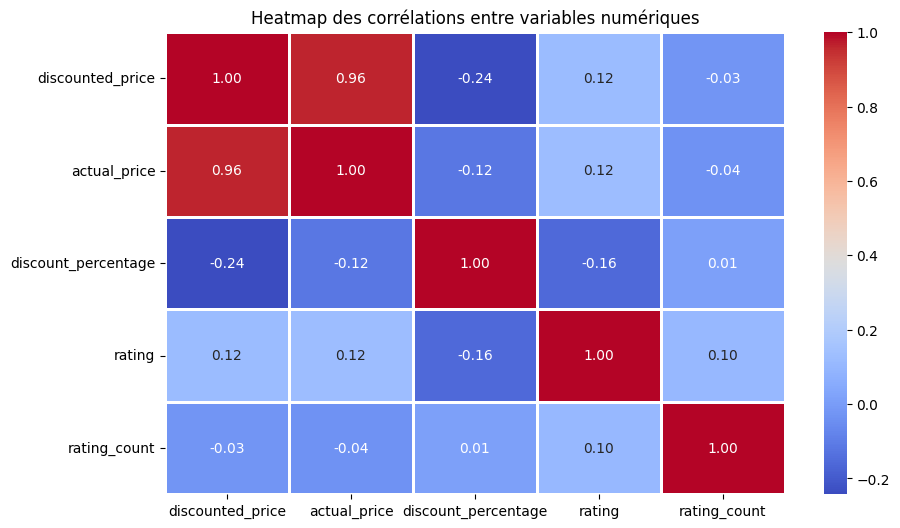

In [81]:
# Sélection des colonnes numériques
numeric_df = df2.select_dtypes(include='number')

# Calcul de la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.995)
plt.title("Heatmap des corrélations entre variables numériques")
plt.show()

## 1️⃣ Analyse entre deux variables continues : `rating` vs `discounted_price`

In [82]:
# Corrélation
correlation = df2[['rating', 'discounted_price']].corr()
correlation

,rating,discounted_price
rating,1.000000,0.120337
discounted_price,0.120337,1.000000


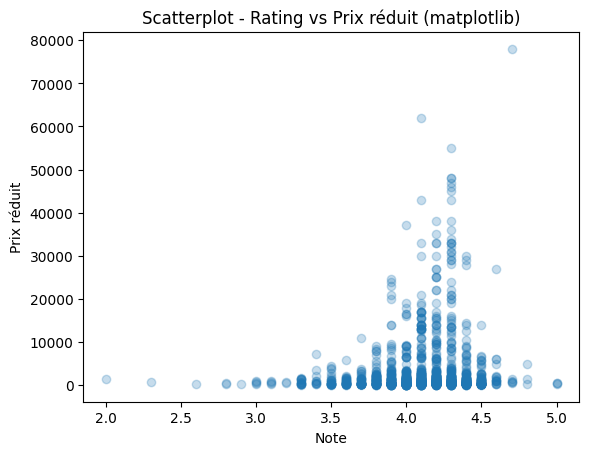

In [83]:
plt.scatter(df2['rating'], df2['discounted_price'], alpha=0.25)
plt.title('Scatterplot - Rating vs Prix réduit (matplotlib)')
plt.xlabel('Note')
plt.ylabel('Prix réduit')

plt.show()

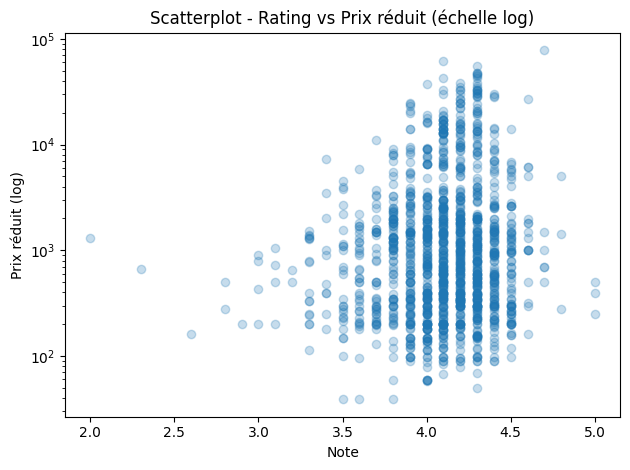

In [84]:
plt.scatter(df2['rating'], df2['discounted_price'], alpha=0.25)
plt.yscale('log')
plt.title('Scatterplot - Rating vs Prix réduit (échelle log)')
plt.xlabel('Note')
plt.ylabel('Prix réduit (log)')

plt.tight_layout()
plt.show()

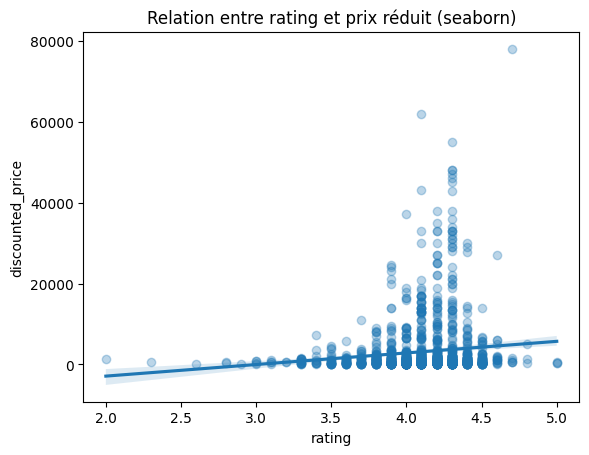

In [85]:
sns.regplot(x='rating', y='discounted_price', data=df2, scatter_kws={'alpha':0.3})
plt.title('Relation entre rating et prix réduit (seaborn)')
plt.show()

## 2️⃣ Analyse entre deux variables catégorielles : `category` vs `rating_level`

In [86]:
# Tableau croisé
crosstab = pd.crosstab(df2['category'], df2['rating_level'])
crosstab.head()

rating_level,High,Medium
category,,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,0,1
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,2,0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,0,1
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,0,2
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,2,0


In [87]:
# On sélectionne les 10 catégories les plus fréquentes pour meilleure lisibilité
top_cats = df2['category'].value_counts().head(10).index
subset = df2[df2['category'].isin(top_cats)]
pivot = pd.crosstab(subset['category'], subset['rating_level'])
pivot

rating_level,High,Medium
category,,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,198,35
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",22,2
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",23,29
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",22,2
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",15,34
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",59,4
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,59,9
Electronics|WearableTechnology|SmartWatches,56,20
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,14,13


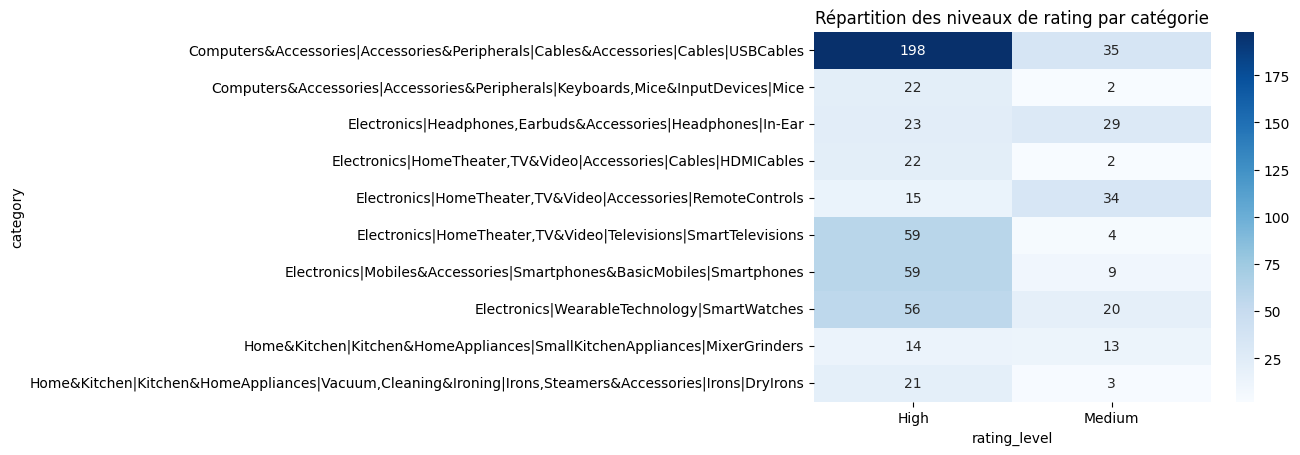

In [88]:
sns.heatmap(pivot, annot=True, cmap='Blues', fmt='d')
plt.title('Répartition des niveaux de rating par catégorie')
plt.show()

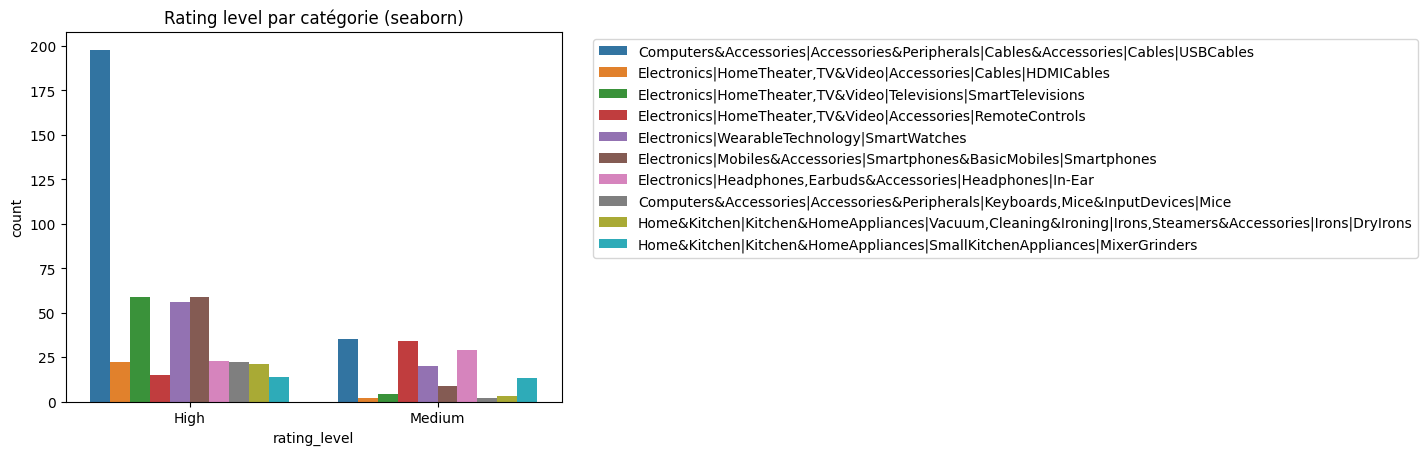

In [89]:
sns.countplot(data=subset, x='rating_level', hue='category')
plt.title('Rating level par catégorie (seaborn)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 3️⃣ Analyse entre une variable continue et une variable catégorielle : `discounted_price` selon `rating_level`

In [90]:
df2['discounted_price'].describe()

,discounted_price
count,1465.000000
mean,3125.310874
std,6944.304394
min,39.000000
25%,325.000000
50%,799.000000
75%,1999.000000
max,77990.000000


In [91]:
df2.groupby('rating_level')['discounted_price'].describe()

,count,mean,std,min,25%,50%,75%,max
rating_level,,,,,,,,
High,1111.0,3582.349433,7714.584324,50.0,340.0,825.0,2199.0,77990.0
Medium,354.0,1690.932797,3183.330935,39.0,279.5,749.0,1599.0,24499.0


/tmp/ipython-input-92-1734969177.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating_level', y='discounted_price', data=df2, palette='Set2')


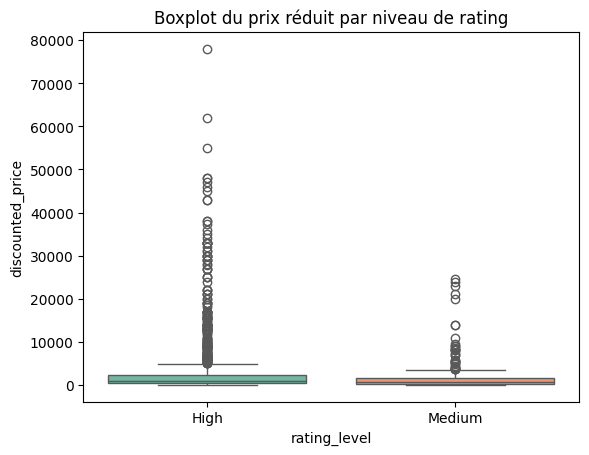

In [92]:
sns.boxplot(x='rating_level', y='discounted_price', data=df2, palette='Set2')
plt.title('Boxplot du prix réduit par niveau de rating')
plt.show()

# **Etape 4 : Questions**

## 🔎 Question 1 : Quels produits ont le meilleur rapport qualité-prix ?

In [93]:
# une autre copie de notre données
df3 = df2.copy()

In [94]:
df3['rapport_qualité_prix'] = df3['rating'] / df3['discounted_price']
df3[['product_name', 'discounted_price', 'rating', 'rapport_qualité_prix', 'category']].sort_values(by='rapport_qualité_prix', ascending=False).head(10)

,product_name,discounted_price,rating,rapport_qualité_prix,category
975,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,39.00,3.8,0.097436,Computers&Accessories|Accessories&Peripherals|...
997,Inventis 5V 1.2W Portable Flexible USB LED Lig...,39.00,3.6,0.092308,Computers&Accessories|Accessories&Peripherals|...
645,GIZGA essentials Universal Silicone Keyboard P...,39.00,3.5,0.089744,Computers&Accessories|Accessories&Peripherals|...
616,Classmate Octane Neon- Blue Gel Pens(Pack of 5...,50.00,4.3,0.086000,OfficeProducts|OfficePaperProducts|Paper|Stati...
178,FLiX (Beetel Flow USB to Micro USB PVC Data Sy...,57.89,4.0,0.069097,Computers&Accessories|Accessories&Peripherals|...
478,Flix Micro Usb Cable For Smartphone (Black),59.00,4.0,0.067797,Computers&Accessories|Accessories&Peripherals|...
727,Flix Micro Usb Cable For Smartphone (Black),59.00,4.0,0.067797,Computers&Accessories|Accessories&Peripherals|...
23,Flix Micro Usb Cable For Smartphone (Black),59.00,4.0,0.067797,Computers&Accessories|Accessories&Peripherals|...
44,FLiX (Beetel USB to Micro USB PVC Data Sync & ...,59.00,4.0,0.067797,Computers&Accessories|Accessories&Peripherals|...
710,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,59.00,3.8,0.064407,Computers&Accessories|Accessories&Peripherals|...


## 🔎 Question 2 : Les produits très remisés seraient-ils perçus comme de moins bonne qualité ?

Corrélation entre remise et note moyenne : -0.15537543972692883


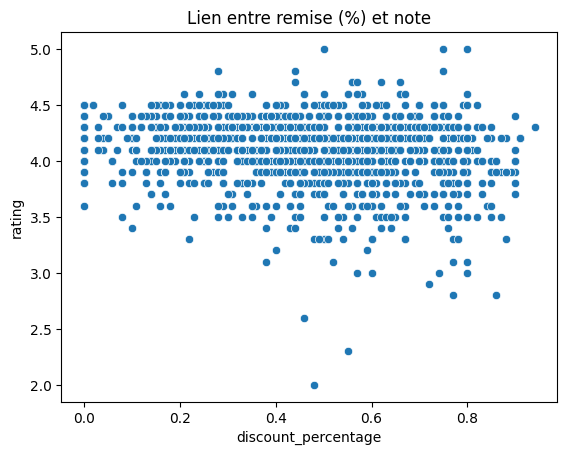

In [95]:
corr = df3[['discount_percentage', 'rating']].corr().iloc[0, 1]
print('Corrélation entre remise et note moyenne :', corr)

# Visualisation
sns.scatterplot(data=df1, x='discount_percentage', y='rating')
plt.title('Lien entre remise (%) et note')
plt.show()

## 🔎 Question 3 : Les produits les mieux notés viennent-ils d’une même catégorie ?

On veut savoir si les produits qui ont les meilleures notes (rating) appartiennent tous ou majoritairement à une seule et même catégorie, ou s’ils sont répartis sur plusieurs.

In [96]:
# En utilisant la variable "rating level"
df2.groupby('rating_level')['category'].value_counts()

rating_level  category                                                                                             
High          Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        198
              Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             59
              Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      59
              Electronics|WearableTechnology|SmartWatches                                                               56
              Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              23
                                                                                                                      ... 
Medium        Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|Juicers                                         1
              Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|WaffleMakers&Irons                              1
              Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Vacuums&FloorCare|Vacuums|CanisterVacuums      1
              Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterCartridges                             1
              MusicalInstruments|Microphones|Condenser                                                                   1
Name: count, Length: 279, dtype: int64

On peut aussi le faire en identifiant les 100 produits ayant les plus grandes notes

In [97]:
# Étape 1 : Trier les produits selon leur note
# On commence par identifier les produits les mieux notés dans l’ensemble du dataset.

top_rated_products = df3[['product_name', 'category', 'rating']] \
    .sort_values(by='rating', ascending=False) \
    .head(100)


In [98]:
# Étape 2 : Extraire la catégorie de ces produits
# Une fois qu’on a les meilleurs produits, on regarde leur colonne category

top_categories = top_rated_products['category']

In [99]:
# Étape 3 : Compter les catégories
# On utilise .value_counts() pour voir combien de fois chaque catégorie revient parmi les produits les mieux notés.

category_counts = top_categories.value_counts()
print(category_counts)

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                               16
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                                   6
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders                                          4
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|MousePads     3
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                         3
Electronics|Mobiles&Accessories|MobileAccessories|Maintenance,Upkeep&Repairs|ScreenProtectors                    3
Computers&Accessories|Accessories&Peripherals|PCGamingPeripherals|GamingMice                                     2
Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters                                 2
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryer

## 🔎 Question 4 : Quelles catégories dominent les ventes en nombre de produits ?

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                        233
Electronics|WearableTechnology|SmartWatches                                                               76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                      68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                             63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                              52
Electronics|HomeTheater,TV&Video|Accessories|RemoteControls                                               49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders                                  27
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice                            24
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                                            24
Home&Kitch

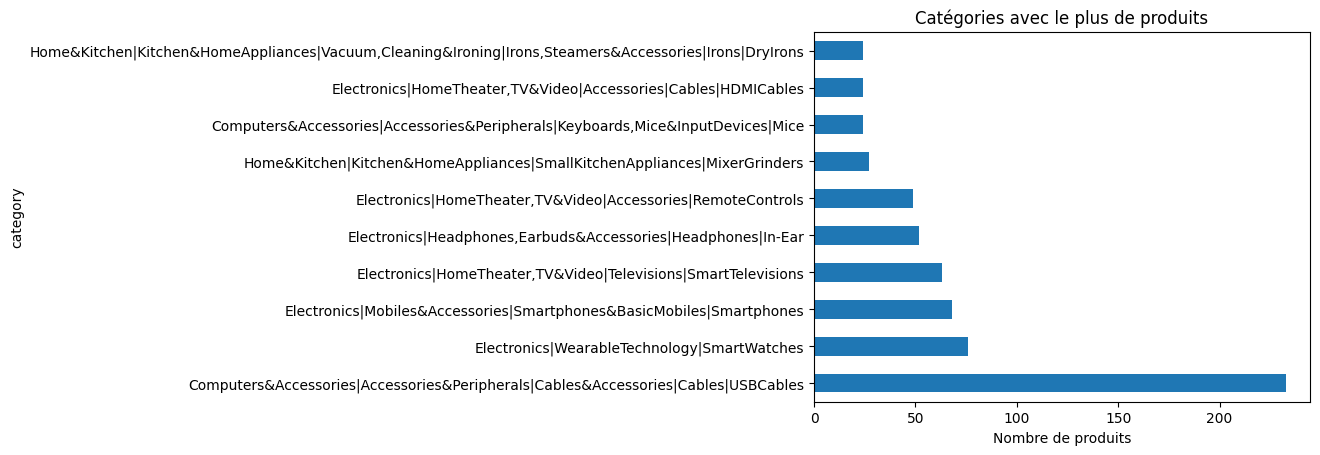

In [100]:
top_categories = df3['category'].value_counts().head(10)
print(top_categories)

# Visualisation
top_categories.plot(kind='barh', title='Catégories avec le plus de produits')
plt.xlabel('Nombre de produits')
plt.show()

## **Quiz 0 : Le produits les mieux notés sont-ils les plus chers ?**

## **Quiz 1 : Quel est le top 5 des catégories avec le meilleur rapport qualité-prix**

## **Quiz 2 : Les produits les mieux notés (ayant une note supérieure à 4) viennent-ils d’une même catégorie ?**